In [2]:
import pandas as pd
import numpy as np
import os, sys

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("ML470_S8_Wholesale Customers data_Practice.csv")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound).round(2)

df = df.drop(columns=['Detergents_Paper'])
scaled_df = StandardScaler().fit_transform(df)

In [4]:
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(scaled_df)
df['Cluster'] = clusters
print(df['Cluster'].value_counts())

Cluster
 1    288
 0    138
-1     14
Name: count, dtype: int64


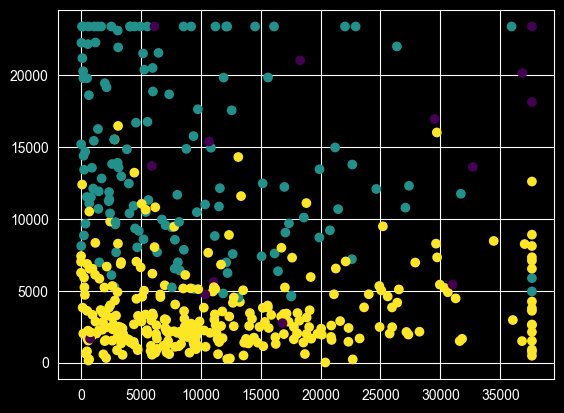

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(
    df["Fresh"],
    df["Grocery"],
    c=df["Cluster"],
    cmap="viridis"
)